<p style="text-align: center;font-size:50px">
 Lab8: Transformada Wavelet
</p>

#### **Tabla de Contenido**

1. [Introducción](#introduccion)
2. [Objetivos](#objetivos)
3. [Materiales](#materiales)
4. [Procedimiento](#procedimiento)
5. [Resultados](#resultados)
6. [Discusión](#discusion)
7. [Conclusiones](#conclusiones)
8. [Bibliografía](#bibliografia)


## Introducción
<p style="text-align:justify;">
La Transformada Wavelet es una técnica matemática que permite analizar señales no estacionarias de forma local tanto en el tiempo como en la frecuencia, lo que la hace ideal para detectar eventos transitorios y cambios bruscos en las señales. A diferencia de la Transformada de Fourier, que proporciona información global de las frecuencias presentes en una señal sin indicar cuándo ocurren, la Transformada Wavelet permite descomponer la señal en componentes a diferentes escalas, ofreciendo un análisis multiresolución. Esto significa que se puede capturar información sobre cuándo y qué frecuencias están presentes en distintos momentos, lo cual es especialmente útil para analizar señales complejas donde las características varían en el tiempo [1].</p>


**Algunas aplicaciones de la transformada Wavelet son:**
- Analisis de señales biomédicas(ECG)
- Analisis de señales sísmicas
- Analisis de señales de sonido 
- Compresión y procesamiento de imágenes 
- Reconocimiento de patrones.


<p style="text-align:justify">
Para la Transformada Wavelet, se utiliza una función base que es llamada Wavelet madre o Wavelet original, la cual servirá como prototipo para realizar el análisis de la señal. Este proceso consiste en descomponer la señal en versiones trasladadas (en tiempo) y escaladas de la wavelet madre. [2] [3]
</p>

<!--<div style="text-align: center;">
    <img src="imagenes/1.png" alt="Descripción de la imagen" width="500">
</div>
-->
$$
\Large \psi_{a,b}(x) = \frac{1}{\sqrt{|a|}} w\left(\frac{x - b}{a}\right), \quad a,b \in \mathbb{R}, \quad a \neq 0
$$


<ul>
  <li><strong>a</strong> (escala): Controla si la wavelet está comprimida o estirada, lo que afecta la capacidad para detectar frecuencias altas o bajas.</li>
  <li><strong>b</strong> (traslación): Determina la posición en el tiempo (o espacio) donde la wavelet analiza la señal.</li>
  <li><em>w(x)</em>: Es la <em>wavelet madre</em>, la función original sin escalado ni traslación.</li>
  <li><em>&#968;<sub>a,b</sub>(x)</em>: Es la wavelet generada al escalar y trasladar la wavelet madre para adaptarse a la señal.</li>
</ul>



### **Tipos de Wavelet**

Existen diferentes tipos de transformadas wavelet que se pueden aplicar según el tipo de análisis que se desea realizar. A continuación, se mencionan las dos más importantes:

#### 1. Transformada Wavelet Continua (CoWT) [3]

La **Transformada Wavelet Continua** (CoWT) se utiliza para obtener una serie de coeficientes que indican qué tan parecida es la señal a analizar con la wavelet madre empleada. Esto se realiza a través de la convolución de la señal con versiones escaladas y trasladadas de la wavelet madre $ \psi(t) $.

El análisis continuo tiene la ventaja de que no se discretizan las señales ni las wavelets, lo que permite un análisis detallado de todas las escalas y posiciones. Sin embargo, esto puede implicar un mayor costo computacional debido a que se trabaja con un número infinito de escalas y tiempos.

La ecuación matemática que define la CoWT es:

$$
CoWT(b,a) = \frac{1}{\sqrt{|a|}} \int_{-\infty}^{\infty} x(t) \psi\left(\frac{t - b}{a}\right) dt
$$

Donde:
- $ \ x(t) $  es la señal a analizar.
- $ \psi(t) $ es la wavelet madre.
-  a  es el parámetro de escala.
-  b  es el parámetro de traslación.



#### 2. Transformada Wavelet Discreta (DWT)

Por otro lado, la **Transformada Wavelet Discreta** (DWT) discretiza tanto la señal como las wavelets. A diferencia de la CoWT, la DWT se realiza a partir de una selección específica de escalas y traslaciones, lo que permite reducir la cantidad de cálculos sin perder demasiada información de la señal. Es comúnmente utilizada en compresión de señales y procesamiento de imágenes.

La ecuación matemática de la DWT es:

$$
DWT(n,m) = \sum_{t} x(t) \psi_{n,m}(t)
$$

Donde:
- $ \psi_{n,m}(t) $  representa la wavelet madre con parámetros discretos de escala \( n \) y traslación \( m \).

#### Wavelets 1D y 2D

- **Wavelet 1D**: Se utiliza para analizar señales unidimensionales, como las series temporales o señales de audio. En este caso, la wavelet se aplica en una sola dimensión (el tiempo).
  
- **Wavelet 2D**: Se aplica para señales bidimensionales, como imágenes, donde se analizan dos dimensiones (normalmente espacio en lugar de tiempo). Esto permite un análisis en detalle tanto horizontal como vertical.

### **Tipos de Wavelet Madre**

<p style="text-align:justify">
Para la elección del tipo de wavelet dependerá del tipo de señal que se esté analizando y también del tipo de información que se desea obtener. Se pueden seguir dos criterios de selección para el tipo de wavelet:

El primero es buscar wavelets que se parezcan a la señal (en forma) y el segundo método es realizar pruebas con diferentes wavelets y seleccionar los que arrojan mejores resultados. [5]
</p>



##### **Algunas Wavelet Madre conocidas [4]**

1. **Daubechies (db):**

   **Características**: Las wavelets de Daubechies tienen soporte compacto y están diseñadas para tener el mayor número de momentos de desvanecimiento posible para un determinado ancho de ventana. Se utilizan ampliamente en la Transformada Wavelet Discreta (DWT) y continua.

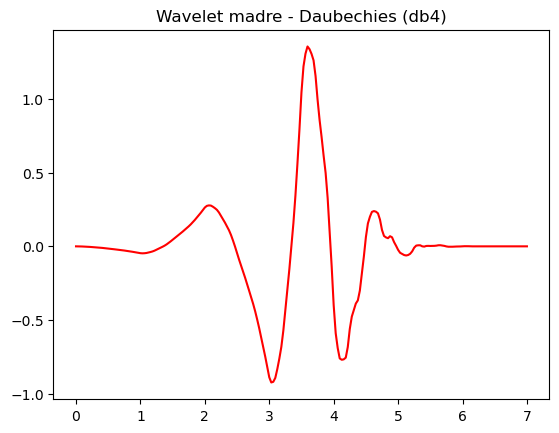

In [6]:


# Crear una wavelet madre Daubechies (db4)
wavelet = pywt.Wavelet('db4')

# Obtener los coeficientes de la wavelet madre y generar su representación
phi, psi, x = wavelet.wavefun(level=5)

# Graficar la wavelet madre (psi)
plt.plot(x, psi,"red")
plt.title('Wavelet madre - Daubechies (db4)')
plt.show()


2. **Biortogonales (bior):**

   **Características**: Las wavelets biortogonales permiten una reconstrucción exacta y simétrica, lo que no es posible con wavelets ortogonales excepto en la wavelet Haar. Tienen soporte compacto.

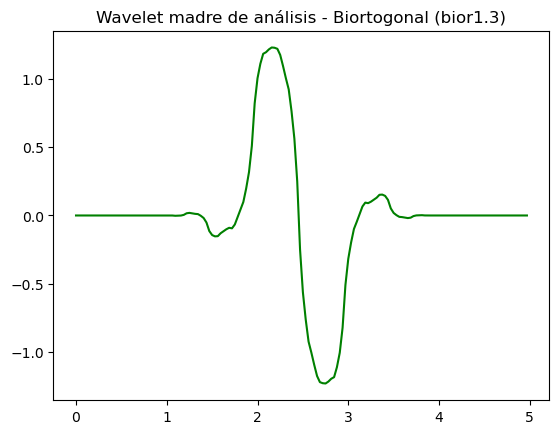

In [12]:
# Crear una wavelet madre biortogonal (por ejemplo, 'bior1.3')
wavelet = pywt.Wavelet('bior1.3')

# Obtener los coeficientes de la wavelet madre y generar su representación
phi_d, psi_d, phi_r, psi_r, x = wavelet.wavefun(level=5)

# Graficar la wavelet de análisis (psi_d)
plt.plot(x, psi_d,"g")
plt.title('Wavelet madre de análisis - Biortogonal (bior1.3)')
plt.show()


3. **Symlets (sym):**

   **Características**: Las wavelets Symlets son una versión más simétrica de las wavelets Daubechies, con menos asimetría y un número similar de momentos de desvanecimiento.

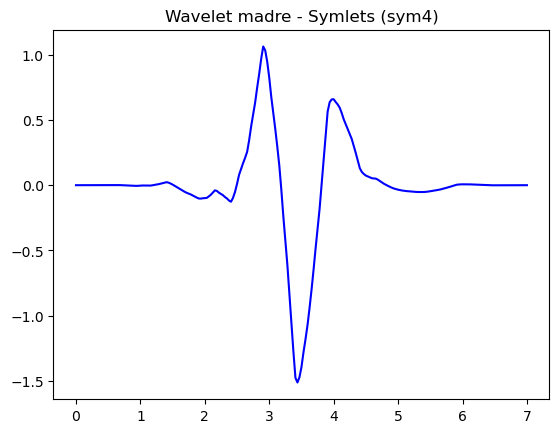

In [13]:
wavelet = pywt.Wavelet('sym4')

# Obtener los coeficientes de la wavelet madre y generar su representación
phi, psi, x = wavelet.wavefun(level=5)

# Graficar la wavelet madre (psi)
plt.plot(x, psi,"b")
plt.title('Wavelet madre - Symlets (sym4)')
plt.show()


4. **Morlet (morl):**

   **Características**: La wavelet de Morlet es una función sinusoidal modulada por una envolvente Gaussiana. Es muy útil en el análisis continuo debido a su buena localización en frecuencia.

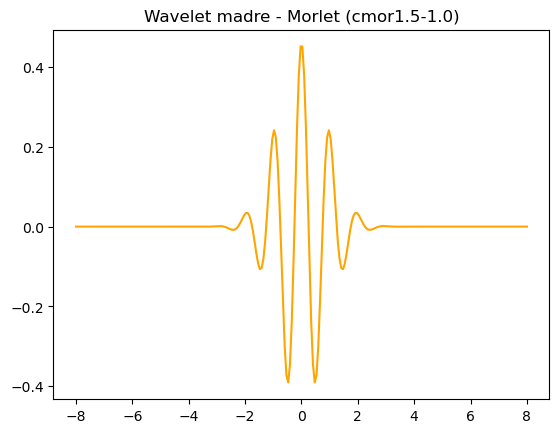

In [17]:
# Definir los parámetros de la wavelet Morlet
wavelet = pywt.ContinuousWavelet('cmor1.5-1.0')  # Esta es una Morlet compleja

# Crear el rango de valores para 'x'
x = np.linspace(-1, 1, num=1000)

# Obtener la wavelet madre
psi, x = wavelet.wavefun()

# Graficar la wavelet madre
plt.plot(x, psi.real,"orange")
plt.title('Wavelet madre - Morlet (cmor1.5-1.0)')
plt.show()


5. **Mexican Hat (mexh):**

   **Características**: También conocida como la onda sombrero mexicano, esta wavelet es la segunda derivada de una función Gaussiana. Tiene buena localización en el tiempo.

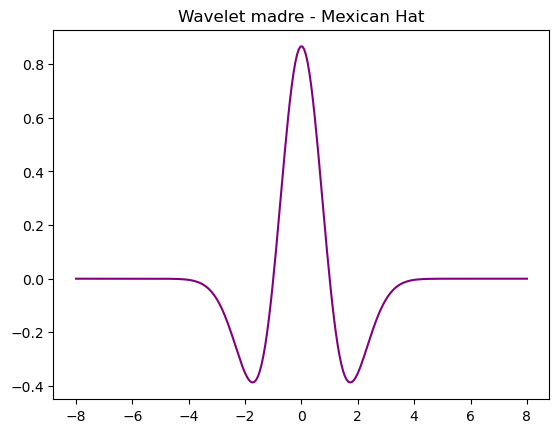

In [23]:
# Crear una wavelet madre Mexican Hat (Ricker wavelet)
wavelet = pywt.ContinuousWavelet('mexh')

# Obtener la representación de la wavelet madre
psi, x = wavelet.wavefun()

# Graficar la wavelet madre (Mexican Hat)
plt.plot(x, psi,"purple")
plt.title('Wavelet madre - Mexican Hat')
plt.show()

### **Caracteristicas de las Wavelets [3]**

Para que una funcion de analisis sea clasificada como Wavelet $\psi(t)$ , debe cumplir ciertos criterios.


1. **Energía finita**:  
   Para que una wavelet sea válida, debe tener energía finita. Esto se expresa matemáticamente como:

   $$
   E = \int_{-\infty}^{\infty} |\psi(t)|^2 dt < \infty
   $$

2. **Criterio de Admisibilidad**:  
   La función wavelet \( \psi(t) \) también debe cumplir con el criterio de la constante de admisibilidad \( C_\psi \), el cual se define como:

   $$
   C_\psi = \int_0^{\infty} \frac{|\hat{\psi}(f)|^2}{f} df < \infty
   $$

    Aquí, $\hat{\psi}(f)$ es la transformada de Fourier de la wavelet $\psi(t)$ y $f$ representa la frecuencia.



3. **Transformada de Fourier para Wavelets Complejas**:  
   En el caso de wavelets complejas, la transformada de Fourier $\psi(t)$  debe ser real y desvanecida para las frecuencias negativas.

 #### **Wavelet para Bioseñales**

 <p style="text-align:justify;">
La transformada wavelet ha demostrado ser una técnica esencial en el procesamiento de bioseñales como EMG, EEG y VPA, al permitir un análisis multiescalar que descompone las señales en sus componentes de tiempo y frecuencia. Este enfoque es particularmente útil para estudiar señales biomédicas no estacionarias, donde se requiere información precisa sobre eventos que ocurren en distintas escalas temporales. En el estudio realizado por Rafiee et al. (2011), se evaluaron 324 funciones wavelet madre, identificando a la wavelet Daubechies 44 (db44) como la más adecuada para correlacionarse con estas bioseñales. Esto se debe a que la db44 ofrece una mayor similitud con las características de las señales EMG, EEG y VPA, capturando detalles importantes como picos musculares, actividad neuronal y cambios vasculares. El uso de la wavelet db44 proporciona una resolución flexible en el análisis de tiempo-frecuencia, lo que facilita la identificación y clasificación de eventos específicos en las señales biomédicas, mejorando su aplicabilidad en áreas como el diagnóstico, la neuroprótesis y la investigación fisiológica[6].  ​</p>

 <a id="objetivos"></a>

## Objetivos
- Entender los principios básicos del filtro Wavelet
- Aplicar el filtro wavelet en señales obtenidas de EMG,ECG y EEG
- Calcular la relación señal-ruido tras aplicar los filtros
- Discutir las señales obtenidas tras aplicar los filtros

## Materiales
| Material | Cantidad |
|:--------------:|:--------------:|
| Programa *Python* | N.A | 

## Procedimiento
El procedimiento consistirá en el diseño de un filtro especializado para las señales de EMG, ECG y EEG, basado en una revisión bibliográfica. En primer lugar, se aplicará el filtrado a tres señales de EMG obtenidas en diferentes condiciones: reposo, contracción sin resistencia, y contracción con fuerza de oposición. En segundo lugar, se procesarán tres señales de ECG registradas durante reposo, mientras se mantenía la respiración, y después de realizar ejercicio aeróbico. En tercer lugar, se aplicará el filtrado a tres señales de EEG captadas en reposo con los ojos cerrados, durante el parpadeo, y durante la resolución de ejercicios matemáticos. Finalmente, se calculará la relación señal/ruido con el fin de evaluar la calidad del filtrado.
1. **Diseño del filtro EMG**
- Para el filtrado de la señal EMG, se tomó como referencia el paper titulado *Wavelet Transform Theory and its Application in EMG Signal Processing* [7], utilizando los siguiente parámetros:
     - **Wavelet**: db4 (Daubechies 6)
     - **Niveles de descomposición**: 4
     - **Modo de umbralización**: soft

2. **Diseño del filtro ECG**
- Para el filtrado de la señal ECG, se tomó como referencia el paper titulado *Denoising ECG Signals by Applying Discrete Wavelet Transform* [8], utilizando los siguientes parámetros:
     - **Wavelet**: sym8
     - **Niveles de descomposición**: 10
     - **Modo de umbralización**: soft

3. **Diseño del filtro EEG**
- Para el filtrado de la señal EEG, se tomó como referencia el paper titulado *EEG Signals Denoising Using Optimal Wavelet Transform Hybridized With Efficient Metaheuristic Methods* [9], utilizando los siguientes parámetros:
     - **Wavelet**: db1 (Daubechies 1)
     - **Niveles de descomposición**: 5
     - **Modo de umbralización**: hard


## **Resultados**


## Filtrado de señales ECG
<p align="justify">
    Empezaremos por aplicar el filtrado mediante wavelets a las señales obtenidas de ECG en el Laboratorio 5. Recordemos que, para este caso, se hiceron tomas de señales para tres actividades en concreto:
</p>

* En reposo
* Mientras se aguantaba la respiración por 10 segundos
* Luego de realizar ejercicio (predominantemente aerobico) durante 5 minutos

<p align="justify">
    Tal como se menciono en el procedimiento, para el filtrado via wavelet para el ECG se tomo como referencia el paper titulado *Denoising ECG Signals by Applying Discrete Wavelet Transform* junto a los parámetros que se especifican. Para lograr esta tarea, se implementaron implementaron una serie de funciones que pueden encontrarse en la sección de Anexos.
</p>

<p align="justify">
   Entre las funciones destacan wavelet_filter, SURE_threshold, y calcular_SNR. En la función wavelet_filter es donde ocurre el proceso de filtrado vía wavelet como tal. Se puede apreciar que en esta función se especifican los parámetros del paper de referencia: los 10 niveles de descomposición, el wavelet madre symlet 8. De igual manera, hace uso de la función SURE_threshold para el cálculo de umbral. En particular, dependiendo si nos encontramos en niveles más altos (menor frecuencia) o más bajos (mayor frecuencia), se aplica un umbral más bajo o más alto respectivamente. El umbral más bajo/débil se justifica debido a que, para el Power Line Interference (PLI) se requiere un umbral menos agresivo. Dado que el PLI (ruido de ~60 Hz) se encuentra en las frecuencias bajas, que son cercanas a las frecuencias útiles del ECG, es conveniente aplicar un umbral más suave para evitar eliminar información valiosa. Por otro lado, un filtro más agresivo es requerido en altas frecuencias (High Frequency, HF) para eliminar el ruido de este rango.
</p>

<p align="justify">
    Posterior a esto, se obtuvieron los siguientes resultados tras filtrar las señales. Nótese que se incluye el SNR (en dB) para cada caso, con el fin de comprobar la calidad del filtrado.
</p>

El SNR calculado para el filtrado del estado basal es de 27.02 dB
Coeficiente de Correlación Cruzada: 0.9683


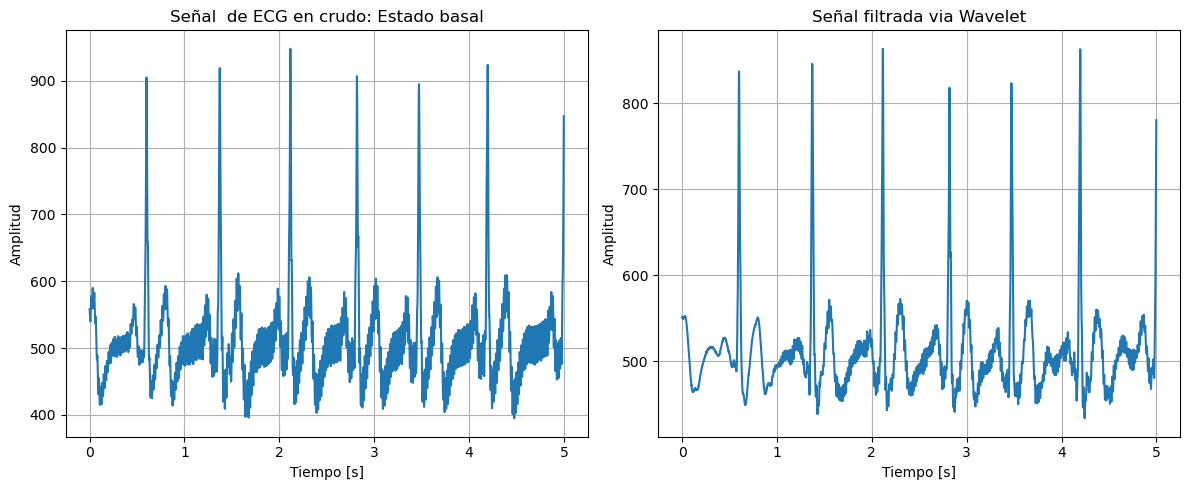

In [8]:
sample, raw_signal = extraer_datos("basal3.txt")
filtered_signal, coefficients = wavelet_filter(raw_signal)
snr = calcular_SNR(raw_signal, filtered_signal)
correlacion, _ = pearsonr(raw_signal, filtered_signal)
print("El SNR calculado para el filtrado del estado basal es de", round(snr, 2), "dB")
print("Coeficiente de Correlación Cruzada:", round(correlacion, 4))

grafica(sample[0:5000], raw_signal[0:5000], filtered_signal[0:5000])

El SNR calculado para el filtrado de aguantar la respiración es de 27.18  dB
Coeficiente de Correlación Cruzada: 0.9609


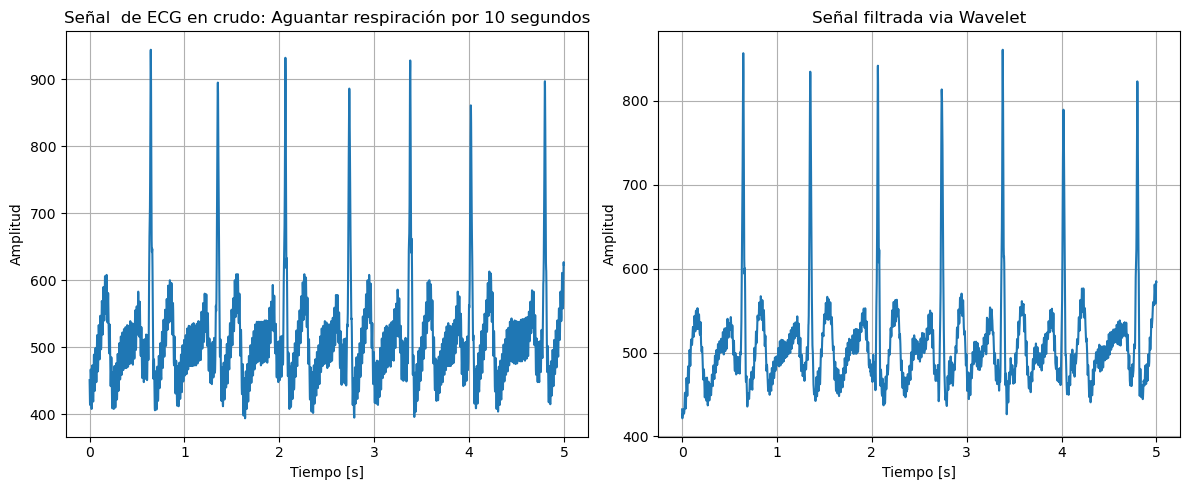

In [10]:
sample, raw_signal = extraer_datos("respiracion3.txt")
filtered_signal, coefficients = wavelet_filter(raw_signal)
snr = calcular_SNR(raw_signal, filtered_signal)
correlacion, _ = pearsonr(raw_signal, filtered_signal)
print("El SNR calculado para el filtrado de aguantar la respiración es de", round(snr, 2), " dB")
print("Coeficiente de Correlación Cruzada:", round(correlacion, 4))

grafica(sample[0:5000], raw_signal[0:5000], filtered_signal[0:5000])

El SNR calculado para el filtrado del estado post-ejercicio es de 26.11  dB
Coeficiente de Correlación Cruzada: 0.9763


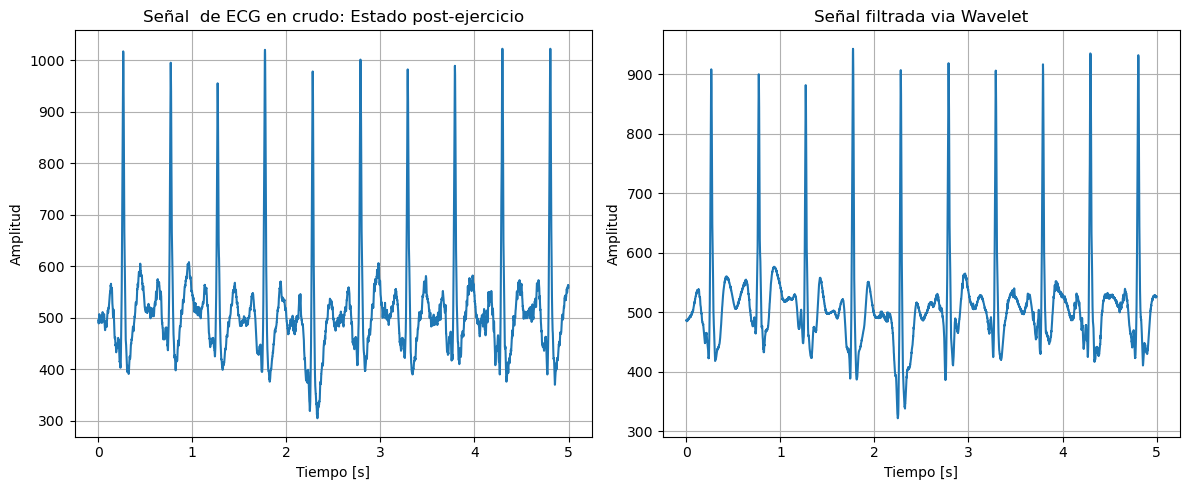

In [4]:
sample, raw_signal = extraer_datos("ejercicio3.txt")
filtered_signal, coefficients = wavelet_filter(raw_signal)
snr = calcular_SNR(raw_signal, filtered_signal)
correlacion, _ = pearsonr(raw_signal, filtered_signal)
print("El SNR calculado para el filtrado del estado post-ejercicio es de", round(snr, 2), " dB")
print("Coeficiente de Correlación Cruzada:", round(correlacion, 4))

grafica(sample[0:5000], raw_signal[0:5000], filtered_signal[0:5000])

## Filtrado de señales EEG  

<p align="justify">  
Para este caso, se procederá a aplicar filtrado mediante Wavelet a las señales obtenidas en el laboratorio 6: Señales EEG. En total, se obtuvieron 5 señales, las cuales son correspondientes a las actividades realizadas:
</p>

* Cerrar ojos y mantener una respiración normal (_o estado basal_)
* Repetir ciclo de abrir y cerrar ojos (20 segundos cada uno)
* Cerrar ojos y mantener una respiración normal, nuevamente (también lo denominaremos como _estado basal_)
* Resolver preguntas aritméticas fáciles
* Resolver preguntas aritméticas complejas

<p align="justify">  
Para la elección de los parámetros para el filtrado de las señales EEG mediante Wavelet se tomó como referencia al artículo titulado <i>"EEG Signals Denoising Using Optimal Wavelet Transform Hybridized With Efficient Metaheuristic Methods"</i>. Usando los parámetros especificados, se realizó el filtrado de las señales.
</p>
  
### Código implementado para el filtrado de señales EEG  

* Se iniciará con la lectura de los datos, los cuales, están almacenados en formato de documento de texto **(.txt)**


```python
with open("señales/EEG/1_basal1.txt","r") as basal_1, open("señales/EEG/2_abrir_cerrar.txt","r") as ojos, open("señales/EEG/3_basal2.txt","r") as basal_2,  open("señales/EEG/4_facil.txt","r") as facil, open("señales/EEG/5_compleja.txt","r") as compleja:
    dato_basal_1 = obtener_dato_de_txt(basal_1)
    dato_ojos = obtener_dato_de_txt(ojos)
    dato_basal_2 = obtener_dato_de_txt(basal_2)
    dato_facil = obtener_dato_de_txt(facil)
    dato_complejo = obtener_dato_de_txt(compleja)  
```
<br>

* Posteriormente, se procederá a realizar la conversión a **mV**, correspondiente al rango y número de bits de resolución que ofrece el dispositivo de medición:  

```python
#conversión de datos a mV
basal_1_mv = convertir_a_mV(dato_basal_1)
ojos_mv = convertir_a_mV(dato_ojos)
basal_2_mv = convertir_a_mV(dato_basal_2)
facil_mv = convertir_a_mV(dato_facil)
complejo_mv = convertir_a_mV(dato_complejo)
```  
<br>

* Finalmente se aplicará el filtrado con los parámetros establecidos y la gráfica de las señales para cada actividad: filtrada y crudo.   
```python
# Aplicar el filtro wavelet
basal_1_filtrado = wavelet_filtrado(basal_1_mv)
ojos_filtrado = wavelet_filtrado(ojos_mv)
basal_2_filtrado = wavelet_filtrado(basal_2_mv)
facil_filtrado = wavelet_filtrado(facil_mv)
complejo_filtrado = wavelet_filtrado(complejo_mv)

#para graficar las señales: cruda y filtrada
graficar(basal_1_mv,basal_1_filtrado,nombre="En estado Basal 1",fs = 1000)
graficar(ojos_mv,ojos_filtrado,nombre="Abriendo y cerrando ojos",fs = 1000)
graficar(basal_2_mv,basal_2_filtrado,nombre="En estado Basal 2",fs = 1000)
graficar(facil_mv,facil_filtrado,nombre="Resolviendo problemas fáciles",fs = 1000)
graficar(complejo_mv,complejo_filtrado,nombre="Resolviendo problemas complejos",fs = 1000)
```  
<br>

***Nota:***  
Las funciones utilizadas en el filtrado de las señales EEG se encontrarán en la sección [Anexos](#anexos)

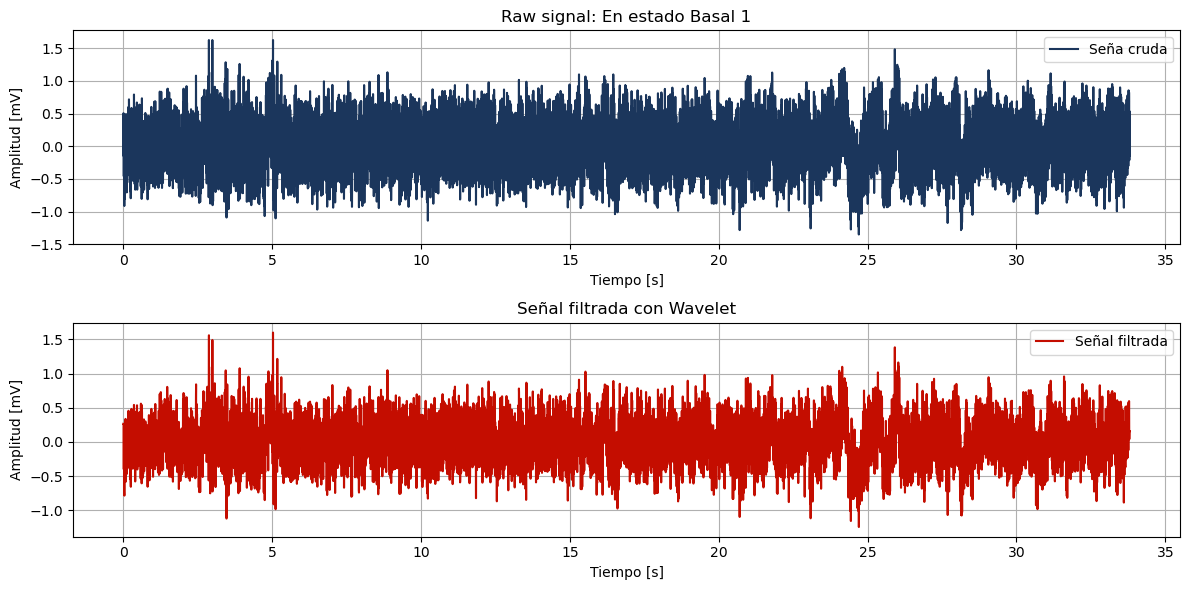

In [3]:
with open("señales/EEG/1_basal1.txt","r") as basal_1, open("señales/EEG/2_abrir_cerrar.txt","r") as ojos, open("señales/EEG/3_basal2.txt","r") as basal_2,  open("señales/EEG/4_facil.txt","r") as facil, open("señales/EEG/5_compleja.txt","r") as compleja:
    dato_basal_1 = obtener_dato_de_txt(basal_1)
    dato_ojos = obtener_dato_de_txt(ojos)
    dato_basal_2 = obtener_dato_de_txt(basal_2)
    dato_facil = obtener_dato_de_txt(facil)
    dato_complejo = obtener_dato_de_txt(compleja)

#obtención de datos en mV (están en STR aún)
basal_1_mv = convertir_a_mV(dato_basal_1)
ojos_mv = convertir_a_mV(dato_ojos)
basal_2_mv = convertir_a_mV(dato_basal_2)
facil_mv = convertir_a_mV(dato_facil)
complejo_mv = convertir_a_mV(dato_complejo)


# Aplicar el filtro wavelet
basal_1_filtrado = wavelet_filtrado(basal_1_mv)
ojos_filtrado = wavelet_filtrado(ojos_mv)
basal_2_filtrado = wavelet_filtrado(basal_2_mv)
facil_filtrado = wavelet_filtrado(facil_mv)
complejo_filtrado = wavelet_filtrado(complejo_mv)


#para graficar las señales: cruda y filtrada
graficar(basal_1_mv,basal_1_filtrado,nombre="En estado Basal 1",fs = 1000)

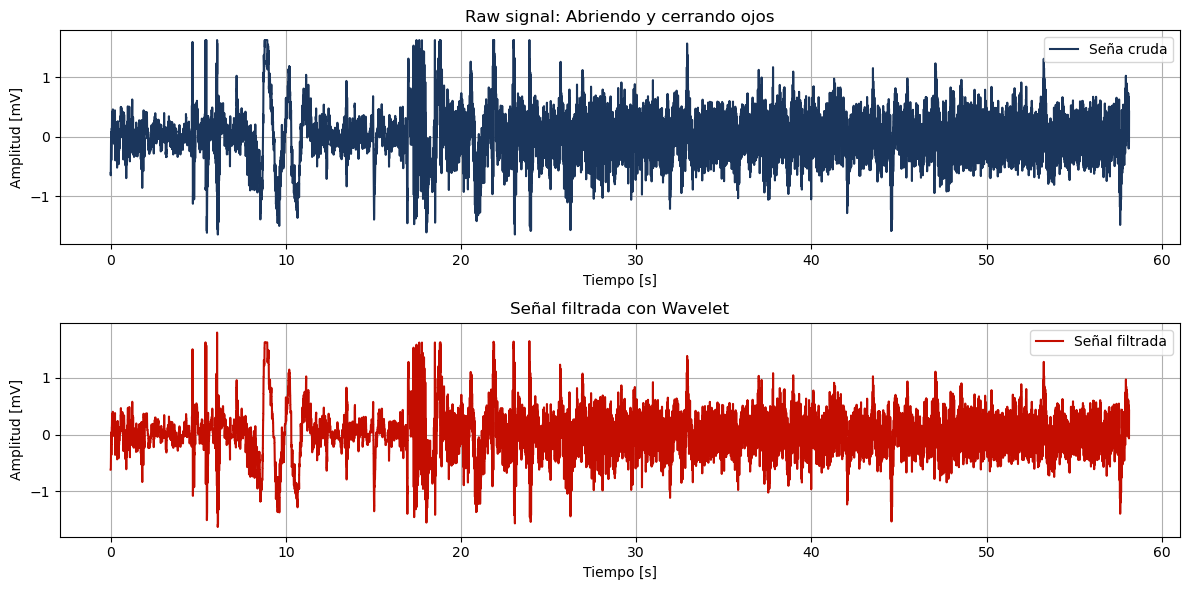

In [4]:
#Para la ejecución de 5 ciclos de apertura y cierre de ojos
graficar(ojos_mv,ojos_filtrado,nombre="Abriendo y cerrando ojos",fs = 1000)

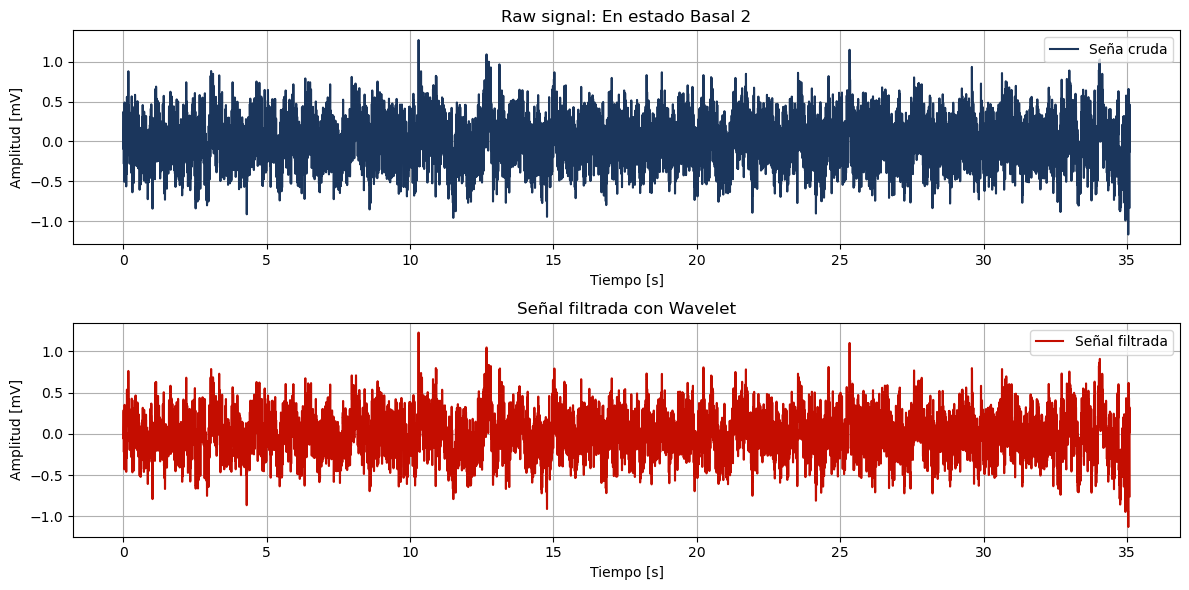

In [5]:
#Para el estado de reposo y respiración normal
graficar(basal_2_mv,basal_2_filtrado,nombre="En estado Basal 2",fs = 1000)

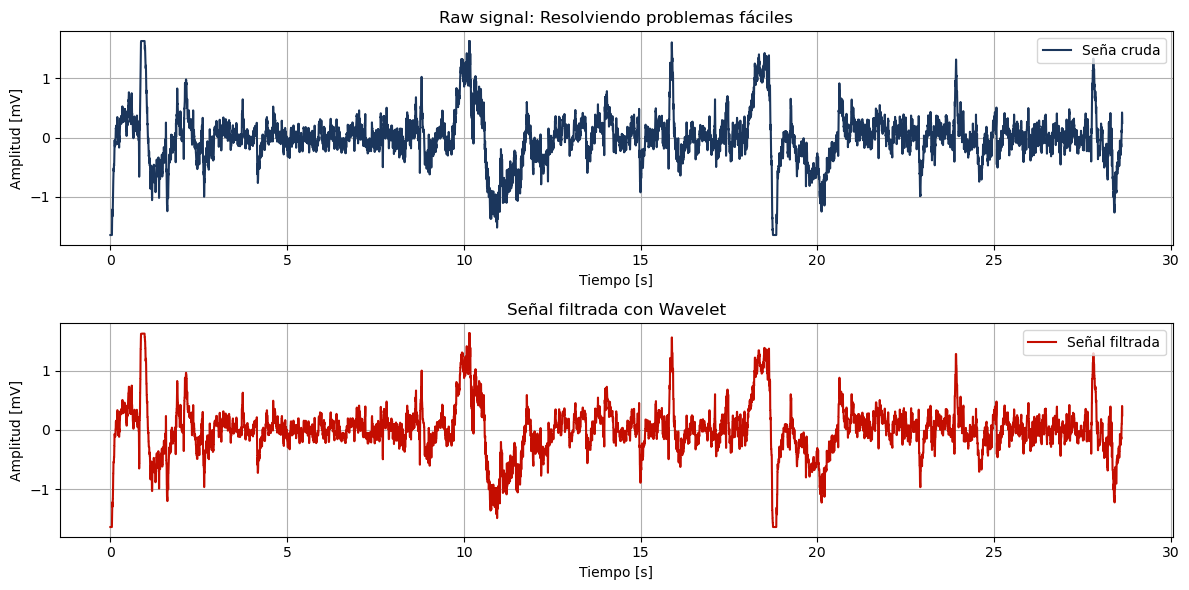

In [6]:
#Para la resolución de problemas aritméticos sencillos
graficar(facil_mv,facil_filtrado,nombre="Resolviendo problemas fáciles",fs = 1000)

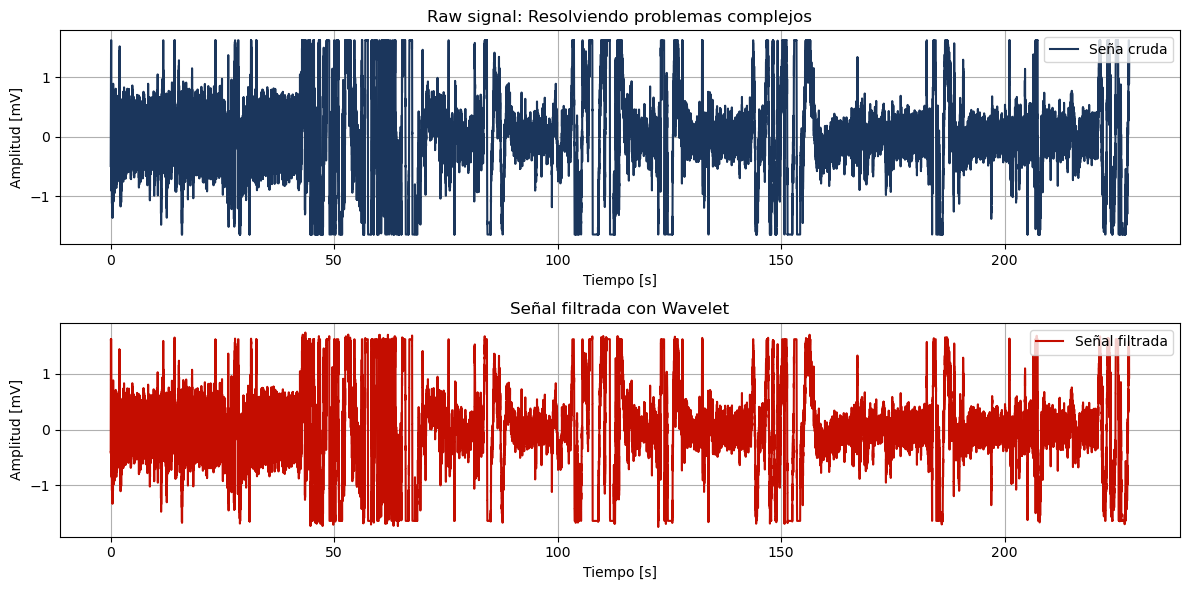

In [7]:
#Para la resolución de problemas aritméticos complejos
graficar(complejo_mv,complejo_filtrado,nombre="Resolviendo problemas complejos",fs = 1000)

### Evaluación del filtrado mediante métricas: SNR<sub>out</sub>  
<div align="justify"> 
Se realizará el análisis SNR<sub>out</sub> (<i>Signal to noise ratio - out</i>). Al analizar para cada señal filtrada, respecto a la señal original (ruidosa), se obtuvieron los siguientes resultados:
</div>

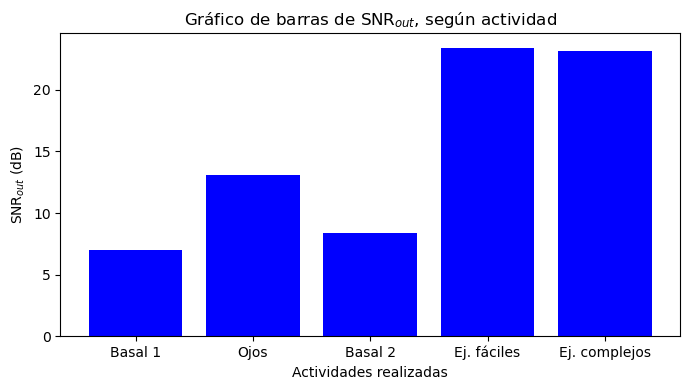

In [8]:
snr_1 = snr_out(basal_1_mv,basal_1_filtrado)
snr_2 = snr_out(ojos_mv,ojos_filtrado)
snr_3 = snr_out(basal_2_mv,basal_2_filtrado)
snr_4 = snr_out(facil_mv,facil_filtrado)
snr_5 = snr_out(complejo_mv,complejo_filtrado)

valores_snr = [snr_1,snr_2,snr_3,snr_4,snr_5]
eje_x_nombre = ['Basal 1','Ojos','Basal 2','Ej. fáciles','Ej. complejos']
graficar_barras(valores_snr, eje_x_nombre, xlabel='Actividades realizadas', ylabel="SNR$_{out}$ (dB)", titulo="Gráfico de barras de SNR$_{out}$, según actividad")

## **Discusión**


## Filtrado de señales ECG
<p align="justify">
    En todos los casos, visualmente, las señales filtradas estan más suavizadas que las originales, lo que nos indica que efectivamente el código implementando logro filtrar la señal. Se calculo para cada caso el coeficiente de correlación cruzado, el cual nos es útil para medir la similitud entre dos señales. Mientras más cercano sea el valor del coeficiente a 1, sugiere alta correlación, lo que nos indica que el filtro no distorsiono en gran medida la señal. Vemos que para los tres casos, el coeficiente es mayor a 0.95, indicando baja distorsión tras la filtración. De igual manera, vemos que para las tres señales filtradas, se obtuvieron valores de SNR mayores a 26 dB. Esto es consistente con lo reportado en el paper de referencia, donde nuestros valores se acercan los 30.5355 dB reportados [A1]. Asimismo, los valores que hemos obtenido gracias al filtrado via wavelet (en particular, el wavelet madre sym8) son los adecuados para un análisis completo de características de una onda ECG, ya que para esto se requiere de un SNR mínimo de 15 dB [A2]. De igual manera, el haber obtendido valores de SNR tan parecidos nos indican una eficacia del wavelet relativamente constante en diferentes condiciones (basal, aguantando respiración y post-ejercicio) a pesar de las variaciones en el tipo y la cantidad de ruido. Esto demuestra la robustez del filtrado wavelet para manejar diferentes tipos de ruido en diversas situaciones fisiológicas. Estos resultados van de la mano con estudios anteriores, donde se demostro que las técnicas de filtrado que se basaban en la transformada de wavelet resultan altamente efectivas por su alto desempeño frente a interferencias comunes en el contexto de ECG: ruido gausiano, artefactos musculares, PLI, etc. [A3]
</p>

<p align="justify">
    Otro motivo de los valores tan consistentes y relativamente altos de SNR puede ser la aplicación del cálculo de umbrales via SURE. El algoritmo SURE (Stein's unbiased risk estimate) es una herramienta adaptativa que permite calcular umbrales optimos para el filtrado. Esto lo logra calculando una serie de umbrales en base a los coeficientes de detalle que se le brinden, y eligiendo el más adecuado. Esto quiere decir que el umbral calculado esta totalmente adaptado para los coeficientes dados, haciendolo más eficaz que umbrales predeterminados/fijos. De igual manera, el algoritmo minimiza el riesgo. Esto quiere decir que el umbral elegido minimiza la perdida de información valiosa de la señal. De igual manera, estos valores de SNR también pueden ser atribuidos al wavelet madre utilizado: symlet 8. Trabajos anteriores han demostrado su efectividad en lo que viene a ser filtrado de señales de ECG en particular. Comparado con wavelets madre como db3, db6 y bior1.3, el  sym8 demuestra valores más altos de SNR [A4], indicando así una mayor capacidad de reducción del ruido. 
</p>

<p align="justify">
    Si bien el SNR para los tres casos fue aceptable, el SNR que más difiere es el obtenido para la señal filtrada correspondiente al ECG tomado luego de los 5 minutos de actividad física. Esta calidad ligeramente inferior podría deberse a las particularidades mismas de la onda. El tejido muscular, con énfasis en el estriado, puede llegar a tener altas demandas energéticas a causa de distintos tipos de estrés como los que ocurren al hacer ejercicio. Esto implica mayor liberación de iones de calcio en el tejido muscular, induciendo más contracción y por tanto mayor liberación de ATP [A5]. Por ende, todo esto desemboca en una cantidad mucho mayor de impulsos eléctricos enviados a causa de la demanda muscular. Entender esto es fundamental ya que existen diversidad de manifestaciones mioeléctricas ocasionadas por la fatiga muscular del estrés mecánico [A6] de eventos como realizar activdad física, más aún si es sostenida en el tiempo. Esta señalización pudo haber interferido en el ECG, en concreto por la actividad residual: incluso si la persona ya no está en movimiento, los músculos que han sido activados pueden continuar generando impulsos. Todo esto resulta en una señal mucho más ruidosa que en los casos anteriores, por lo que aplicar el mismo tipo de filtrado a igual niveles de descomposición pudo no haber sido lo suficiente para eliminar componentes frecuenciales indeseados. No obstante, esto no quita el hecho de que de todas maneras de obtuvo un filtrado aceptable.

</p>

<p align="justify">
    Finalmente, algo a destacar es la capacidad de aplicar distintos tipos de umbrales durante el proceso de filtrado. Durante este, se aplicaron dos umbrales distintos dependiendo del nivel de descomposición. Esto es particularmente útil cuando tenemos componentes frecuenciales que contaminan nuestra señal que se encuentren repartidos a lo largo de todo el espectro de frecuencias de la señal. Por tanto, la transformada wavelet permite aplicar técnicas de filtrado más o menos agresivas dependiendo del nivel de frecuencia donde nos encontremos, como fue en el caso analizado: filtros más agresivos para HF y más suaves para PLI. En ese sentido, la trasformada de wavelet permite mucho mayor control sobre que se filtra y en que magnitud dependiendo del nivel, lo cual abre la posibilidad de técnicas mucho más efectivas para reducir el ruido y artefactos de la señal. 
</p>

## Filtrado EEG:
<p align="justify">
Analizando las gráficas (cruda vs filtradas), visualmente es posible identificar algunas diferencias. Esto puede apreciarse al analizar los picos, en los que, al comparar la señal cruda y la señal filtrada, varios picos son atenuados, es decir, disminuyen en amplitud y hay un ligero suavizado en la señal. Ahora, analizando el valor SNR obtenido, se tiene unos valores mayores para el filtrado de la señal cuando el usuario está realizando actividad cognitiva (aritmética, tanto sencilla como compleja). Para estos casos, se evidenció un SNR mayor a 20 dB, lo que, de acuerdo al artículo de referencia, es de esperarse, puesto que, al evaluar diversos algoritmos para escoger los parámetros más óptimos, los utilizados fueron considerados como los mejores, de acuerdo a varias métricas utilizadas, además del SNR. [9]  
Asimismo, el rendimiento del filtrado de señales EEG tiene buen rendimiento al usarse el wavelet madre db1 [BB], tal y como se muestra en la siguiente tabla:
</p>

<div align="center">
  <img src="/imagenes/tabla_wavelets.png" alt="Tabla de rendimiento de Wavelets" width="700">
  
**Rendimiento del filtrado de señales EEG según Wavelet Madre [BB]**
</div>
<br>

<p align="justify">
Además, se menciona la utilidad de utilizar la wavelet madre <i>db1</i> para el filtrado de señales EEG contaminadas por ruido ocular, lo que podría explicar tener un valor mayor de SNR, comparado con los valores obtenidos en ambos basales (reposo y respiración tranquila). 
Por otro lado, se explica, en otras fuentes, la utilidad de utilizar parámetros como <i>hard-rigrsure</i> para filtrar señales EEG cuando la persona está realizando tareas mentales aritméticas, en el que alcanzan valores de SNR mayores a 40 dB [AA]. Esto tiene sentido, puesto que esta configuración (parámetros) tiene la capacidad de capturar las transiciones que son rápidas, además de la eliminación de coeficientes pequeños (uso del umbral <i>hard</i>), lo que lo hace eficaz ante manejo de señales con frecuencias altas.
</p>
  
<p align="justify">
Ahora, de acuerdo al gráfico de barras de valores de SNR, según la actividad realizada, se aprecia que se tiene valores menores en los basales. Esto podría explicarse, debido al tipo de wavelet madre usada (db1). Por ejemplo, se menciona, en un artículo, la eficacia de utilizar parámetros como <i>db1</i> como wavelet madre y utilizar 3 niveles de descomposición para filtrar ruidos de alta frecuencia, como el ruido electromiográfico (EMG). Sin embargo, ante ruidos de baja frecuencia, como por motivos oculares (parpadeo, por ejemplo), tiendre a no ser óptimo. Se aprecia que es capaz de reducir el ruido de altas frecuencias (suaviza las gráficas), pero se visualiza una ligera distorsión de la señal durante actividades como cerrar los ojos o parpadear (en algunas, las señales tienden a tener comportamiento como aumento de amplitud, relacionada a bajas frecuencias), por lo que no es adecuado para el filtro de ruido en frecuencias bajas; además, que el db1 tiene limitaciones para la captura de características suaves [CC].
</p>


* Fuentes usadas:   

[AA] T. A. Suhail, K. P. Indiradevi, E. M. Suhara, S. A. Poovathinal, y A. Anitha, “Performance Analysis of Mother Wavelet Functions and Thresholding Methods for Denoising EEG Signals during Cognitive Tasks”, en 2020 International Conference on Power, Instrumentation, Control and Computing (PICC), dic. 2020, pp. 1–6. doi: 10.1109/PICC51425.2020.9362377. Disponible en: https://ieeexplore.ieee.org/document/9362377.

[BB] S. N. S. S. Daud, R. Sudirman, N. H. Mahmood, y C. Omar, “Denoising Semi-simulated EEG Signal Contaminated Ocular Noise using Various Wavelet Filters”, 2022 13th International Conference on Information and Communication Systems (ICICS), pp. 452–457, jun. 2022, doi: 10.1109/ICICS55353.2022.9811226. Disponible en: https://ieeexplore.ieee.org/document/9811226/.

[CC] C. Turnip and E. Pardede, "Artefacts Removal of EEG Signals with Wavelet Denoising," International Conference on Information Technology and Electrical Engineering (ICITEE), Yogyakarta, Indonesia, 2016, pp. 1-6. Disponible en: https://bibliotecadigital.usb.edu.co/server/api/core/bitstreams/c77ceb81-363f-4cf2-8f55-18030470ac5b/content.

## Conclusiones

## Bibliografía
[1] "Apuntes sobre Wavelets," Departamento de Ciencias y Tecnología de la Universidad Nacional del Centro de la Provincia de Buenos Aires, [Online]. Available: https://users.exa.unicen.edu.ar/catedras/escuelapav/cursos/wavelets/apunte.pdf. [Accessed: 21-Oct-2024].

[2] S. Kouro R. y R. Musalem M., "Tutorial introductorio a la Teoría de Wavelet," Universidad Técnica Federico Santa María, Valparaíso, Chile. [Online]. Available: http://www2.elo.utfsm.cl/~elo377/documentos/Wavelet.pdf. [Accessed: 21-Oct-2024].

[3] R. González G., "Capítulo 3: Revisión de la Teoría de Wavelets," Universidad de las Américas Puebla, Puebla, México. [Online]. Available: https://catarina.udlap.mx/u_dl_a/tales/documentos/mel/gonzalez_g_ra/capitulo3.pdf. [Accessed: 21-Oct-2024].

[4] E. Pinto Moreno, "Familias de Wavelets," Universidad Carlos III de Madrid, Madrid, España. [Online]. Available: https://e-archivo.uc3m.es/bitstream/10016/16582/1/PFC_Elena_Pinto_Moreno_Anexos.pdf. [Accessed: 21-Oct-2024].

[5] "Acervo para el Mejoramiento del Aprendizaje de Alumnos de Ingeniería, en Inteligencia Artificial," Grupo de Investigación en Sistemas Inteligentes, UNAM Cuautitlán, México. [Online]. Available: https://virtual.cuautitlan.unam.mx/intar/?page_id=1108. [Accessed: 21-Oct-2024].

[6] J. Rafiee, M. A. Rafiee, N. Prause, y M. P. Schoen, "Wavelet basis functions in biomedical signal processing," Expert Systems with Applications. [Online]. Available: https://doi.org/10.1016/j.eswa.2010.11.050.

[7] X. Zhang, Y. Wang and R. P. S. Han, "Wavelet transform theory and its application in EMG signal processing," 2010 Seventh International Conference on Fuzzy Systems and Knowledge Discovery, Yantai, China, 2010, pp. 2234-2238, doi: 10.1109/FSKD.2010.5569532. 

[8] Á. Fehér, "Denoising ECG signals by applying discrete wavelet transform," 2017 International Conference on Optimization of Electrical and Electronic Equipment (OPTIM) & 2017 Intl Aegean Conference on Electrical Machines and Power Electronics (ACEMP), Brasov, Romania, 2017, pp. 863-868, doi: 10.1109/OPTIM.2017.7975078. 

[9] Z. A. A. Alyasseri, A. T. Khader, M. A. Al-Betar, A. K. Abasi, y S. N. Makhadmeh, “EEG Signals Denoising Using Optimal Wavelet Transform Hybridized With Efficient Metaheuristic Methods”, IEEE Access, vol. 8, pp. 10584–10605, 2020, doi: 10.1109/ACCESS.2019.2962658. Disponible en: https://ieeexplore.ieee.org/document/8944069.

## Anexos

### Funciones implementadas para ECG

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def extraer_datos(data):
    # Abrir el archivo de texto
    with open(data, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud

# Funciones para calcular el umbral via SURE, la transformada wavelet y el filtrado, y el SNR
def SURE_threshold(coefficients):
    abs_coefficients = np.abs(coefficients)
    sorted_coefficients = np.sort(abs_coefficients)
    
    n = len(coefficients)
    risks = np.zeros(n)
    for i in range(n):
        t = sorted_coefficients[i]
        soft_coeffs = np.clip(abs_coefficients - t, a_min=0, a_max=None)
        risks[i] = (np.sum(soft_coeffs ** 2) + 2 * (i + 1) * t ** 2)
    
    optimal_threshold = sorted_coefficients[np.argmin(risks)]
    return optimal_threshold

def wavelet_filter(signal, wavelet='sym8', umbral_mode='soft'):
    # Descomposición de la señal usando la transformada wavelet discreta
    coefficients = pywt.wavedec(signal, wavelet, level=10, mode='symmetric')

    # Aplicar umbrales diferentes a los coeficientes de detalle (dependiendo de la frecuencia)
    for i in range(1, len(coefficients)):
        if i <= 4:  # Niveles profundos (PLI - frecuencias bajas)
            threshold = SURE_threshold(coefficients[i])*0.75
            coefficients[i] = pywt.threshold(coefficients[i], threshold, mode=umbral_mode)
        else:  # Niveles superficiales (HF noise - frecuencias altas)
            threshold = SURE_threshold(coefficients[i])*1.35
            coefficients[i] = pywt.threshold(coefficients[i], threshold, mode=umbral_mode)

    # Reconstrucción de la señal filtrada
    filtered_signal = pywt.waverec(coefficients, wavelet)
    filtered_signal = filtered_signal[:len(signal)]
    
    return filtered_signal, coefficients


def calcular_SNR(original_signal, filtered_signal):
    # Calcular la potencia de la señal en crudo
    signal_power = np.mean(original_signal ** 2)
    
    # Calcular el ruido (diferencia entre señal original y señal filtrada)
    noise = original_signal - filtered_signal
    noise_power = np.mean(noise ** 2)
    
    # Calcular el SNR
    snr = signal_power / noise_power
    snr = 10 * np.log10(snr)
    return snr


def grafica(sample, amplitude, filtered_signal):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(sample/1000, amplitude)
    plt.title('Señal  de ECG en crudo: Estado post-ejercicio')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(sample/1000, filtered_signal)
    plt.title('Señal filtrada via Wavelet')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()

### Funciones implementadas para el EEG

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

#Convertir de bits a mV
#Asumamos para el caso del BITalino: 10 (bits), rango: 3.28 -> [-1.64,1.64]
#además, los datos que obtenemos están es STR, trabajemos en STR (convertir a números)
def convertir_a_mV(dato,N_bits=10,valor_minimo=-1.64,valor_máximo=1.64):
    llaves = list(range(0,2**N_bits))
    valores = np.linspace(valor_minimo, valor_máximo, len(llaves))
    dic_valores = dict(zip(llaves,valores))
    
    #para crear una lista directamente, con elementos 0
    data_convertido = np.zeros(len(dato))
    indice = 0
    for valor in dato:
        data_convertido[indice] = dic_valores.get(int(valor), 0)
        indice += 1
    return data_convertido


#Función para obtener datos del TXT
def obtener_dato_de_txt(archivo):
    datos = []
    marcador = False
    #empezar la lactura de los txt
    for linea in archivo: #por cada línea
        if marcador: #recién adjuntará datos al ser verdadero
            datos.append(linea.rstrip().split("\t")[5])
        elif linea.rstrip() == "# EndOfHeader":  #marcador será verdadero a partir la línea esa
            marcador = True
    return datos

#---------métricas----------------
#MSE
def mse(raw_signal, filtered_signal):
    return np.mean((raw_signal - filtered_signal) ** 2)

#RMSE
def rmse(raw_signal, filtered_signal):
    return np.sqrt(mse(raw_signal, filtered_signal))

#SNRout
def snr_out(raw_signal, filtered_signal):
    signal_power = np.sum(raw_signal ** 2)
    noise_power = np.sum((raw_signal - filtered_signal) ** 2)
    return 10 * np.log10(signal_power / noise_power)

#PRD
def prd(raw_signal, filtered_signal):
    numerator = np.sqrt(np.sum((raw_signal - filtered_signal) ** 2))
    denominator = np.sqrt(np.sum(raw_signal ** 2))
    return 100 * (numerator / denominator)


#-----------gráficas------------------
def graficar(señal_cruda, señal_filtrada, nombre= "", fs=1000):

    vector_x1 = np.arange(0,len(señal_cruda))/fs
    vector_x2 = np.arange(0,len(señal_filtrada))/fs
    # Visualización usando matplotlib
    plt.figure(figsize=(12, 6))

    # Gráfico de la señal original (raw)
    plt.subplot(2, 1, 1)
    plt.plot(vector_x1,señal_cruda, label='Seña cruda', color='#1B365C')
    plt.title('Raw signal: ' + nombre)
    plt.xlabel('Tiempo [s]')  # Etiqueta para el eje X
    plt.ylabel('Amplitud [mV]')  # Etiqueta para el eje Y
    plt.legend(loc='upper right')
    plt.grid(True)

    # Gráfico de la señal filtrada
    plt.subplot(2, 1, 2)
    plt.plot(vector_x2,señal_filtrada, label='Señal filtrada', color='#C40D00')
    plt.title('Señal filtrada con Wavelet')
    plt.xlabel('Tiempo [s]')  # Etiqueta para el eje X
    plt.ylabel('Amplitud [mV]')  # Etiqueta para el eje Y
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()

    #Mostrar
    plt.show()

#graficar barras (para métricas)
def graficar_barras(valores, etiquetas, xlabel='', ylabel='', titulo=''):
    plt.figure(figsize=(7, 4))

    # Crear el gráfico de barras
    plt.bar(etiquetas, valores, color='blue')

    # Etiquetas de los ejes
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Título del gráfico
    plt.title(titulo)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


#------------Wavelet-------------
def wavelet_filtrado(señal_cruda, wavelet = "db1", nivel = 5, tipo_umbral = "hard"):

    #descomponer utilizando el wavelet madre y los niveles de descomposición
    coeficientes = pywt.wavedec(señal_cruda, wavelet, level=nivel)

    #aplicar la umbralización (rigrsure), estos serán aplicados a los coef de detalle
    sigma = np.median(np.abs(coeficientes[-1]))/0.6745
    umbral_rigrsure = sigma * np.sqrt(2 * np.log(len(señal_cruda)))

    #aplicar la umbralización hard a los coeficientes de detalle
    coeficientes[1:] = [pywt.threshold(coef,umbral_rigrsure, mode = tipo_umbral) for coef in coeficientes[1:]]

    #reconstrucción de señal con la modificación (filtrado)
    señal_filtrada = pywt.waverec(coeficientes, wavelet)

    #Para que tengan la misma longitud (difieren debido a la reconstrucción)
    if len(señal_cruda) == len(señal_filtrada):
        return señal_filtrada
    elif len(señal_cruda) < len(señal_filtrada):
        return señal_filtrada[0:len(señal_cruda)]
    else:
        #Es como zero padding, pero definido para el extremo final
        filtered_signal = np.pad(filtered_signal, (0, len(señal_cruda) - len(filtered_signal)), 'constant')
        return señal_filtrada